In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

In [2]:
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(6362620, 11)

In [3]:
percentage_to_drop = 0.5  #As the dataset is huge

# Drop a percentage of rows
rows_to_drop = int(percentage_to_drop * len(df))
df = df.iloc[:-rows_to_drop]

# Drop a percentage of columns
# cols_to_drop = int(percentage_to_drop * len(df.columns))
# df = df.iloc[:, :-cols_to_drop]

# Write the modified DataFrame back to a CSV file
df.to_csv('modified_Fraud.csv', index=False)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3181305,239,CASH_OUT,382652.45,C95108625,78237.17,0.00,C1217098811,992993.60,1375646.05,0,0
3181306,239,CASH_OUT,14243.05,C1373177262,0.00,0.00,C651091127,26313.60,40556.64,0,0
3181307,239,CASH_OUT,132966.92,C1452844740,0.00,0.00,C1893233632,4045771.36,4178738.28,0,0
3181308,239,CASH_OUT,75787.30,C2006681147,0.00,0.00,C1405892220,167103.92,242891.22,0,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.181310e+06,3.181310e+06,3.181310e+06,3.181310e+06,3.181310e+06,3.181310e+06,3.181310e+06,3.181310e+06
mean,1.305392e+02,1.577176e+05,8.412748e+05,8.627749e+05,9.954422e+05,1.101880e+06,8.483926e-04,3.143359e-07
std,7.840436e+01,2.675331e+05,2.904171e+06,2.940589e+06,2.302063e+06,2.383886e+06,2.911483e-02,5.606567e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+01,1.261029e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.560000e+02,7.618585e+04,1.458300e+04,0.000000e+00,1.378769e+05,2.237655e+05,0.000000e+00,0.000000e+00
75%,2.010000e+02,2.112092e+05,1.127450e+05,1.522881e+05,9.445692e+05,1.127417e+06,0.000000e+00,0.000000e+00
max,2.390000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.265577e+07,1.000000e+00,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181310 entries, 0 to 3181309
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 267.0+ MB


In [8]:
df.replace({'type':{'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5}}, inplace=True)

In [9]:
df.columns = df.columns.str.replace('\u00A0', '')

columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
df = df.drop(columns_to_drop, axis=1)

In [10]:
#correlation between label and other columns

from scipy import stats
total=0
count=0
for i in df.columns: 
    if i !='Label':
        corr, _=stats.pearsonr(df[i],df['isFraud'])
        total=total+1
            
        if corr >= 0.6 or corr <= -0.6:
            count=count+1
        print("Correlation between "+i+" and column 'isFraud', : %.3f" %corr)
                
print(count,total)
print(count/total)

Correlation between step and column 'isFraud', : -0.005
Correlation between type and column 'isFraud', : 0.013
Correlation between amount and column 'isFraud', : 0.125
Correlation between oldbalanceOrg and column 'isFraud', : 0.005
Correlation between newbalanceOrig and column 'isFraud', : -0.008
Correlation between oldbalanceDest and column 'isFraud', : -0.007
Correlation between newbalanceDest and column 'isFraud', : 0.000
Correlation between isFraud and column 'isFraud', : 1.000
1 8
0.125


<Axes: >

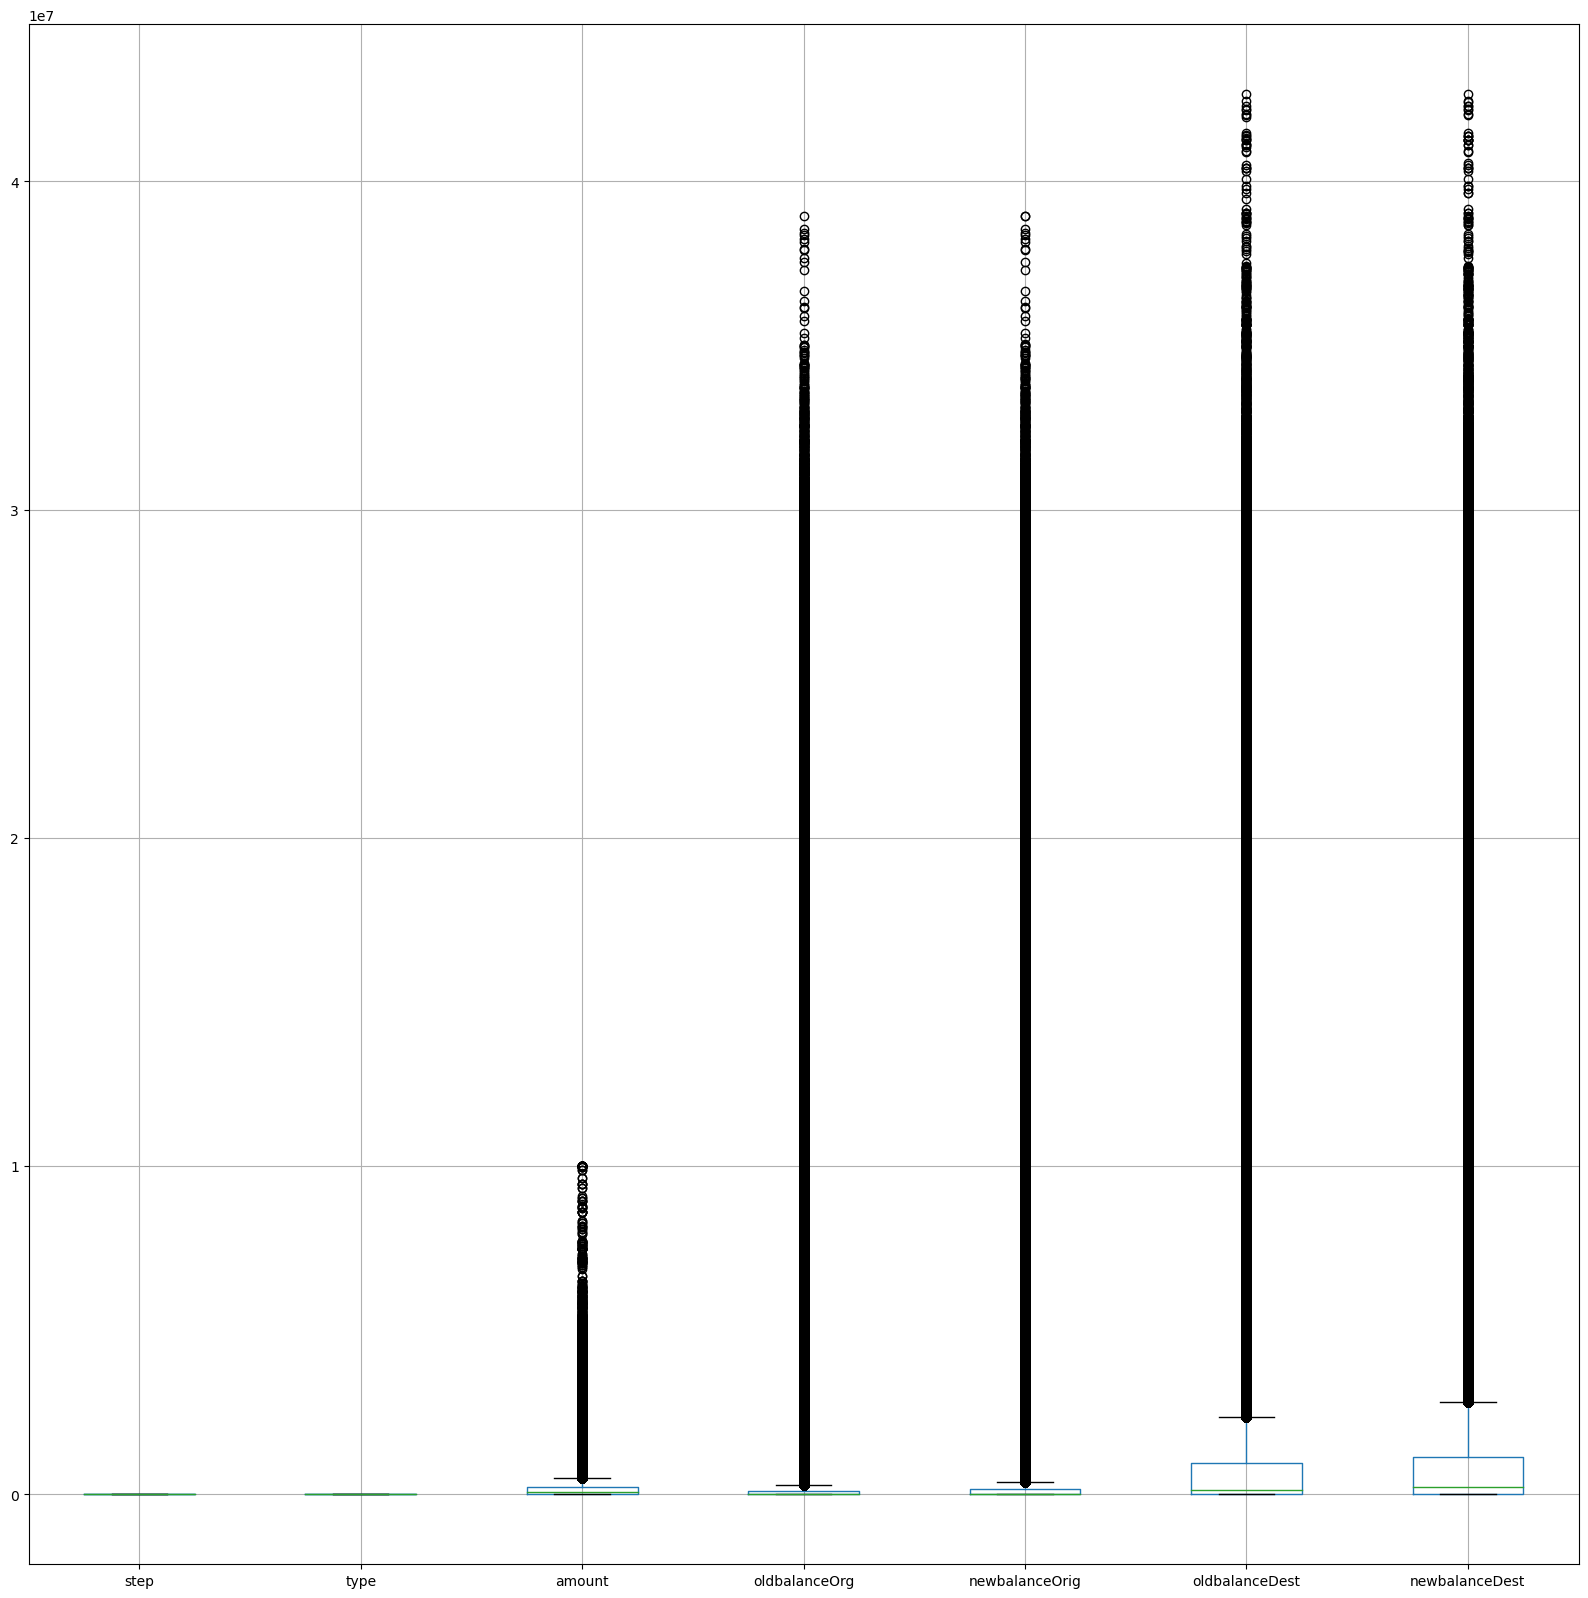

In [11]:
cols=list(df.columns)
box=df.boxplot(column=cols[:len(cols)-1], figsize = (20,20))
box

In [12]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=69)
x_train.shape,x_test.shape

((2545048, 7), (636262, 7))

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
x_train_accuracy=model.predict(x_train)
accuracy_score(x_train_accuracy,y_train)

1.0

In [16]:
x_test_accuracy=model.predict(x_test)
accuracy_score(x_test_accuracy,y_test)

0.9996668039266843

In [17]:
print(classification_report(x_test_accuracy,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635714
           1       0.79      0.83      0.81       548

    accuracy                           1.00    636262
   macro avg       0.90      0.91      0.91    636262
weighted avg       1.00      1.00      1.00    636262



In [18]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(x_train,y_train) 

yPred = rfc.predict(x_test) 

In [23]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
acc = accuracy_score(y_test, yPred) 
print("The accuracy is {}".format(acc)) 

The accuracy is 0.9997705347796977


In [22]:
print(classification_report(yPred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635820
           1       0.76      0.98      0.86       442

    accuracy                           1.00    636262
   macro avg       0.88      0.99      0.93    636262
weighted avg       1.00      1.00      1.00    636262



In [21]:
!pip install xgboost
# Building the XGBoost Classifier (XGB)
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

y_pred_xgb = xgb_classifier.predict(x_test)

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.8 MB 476.3 kB/s eta 0:03:30
   ---------------------------------------- 0.1/99.8 MB 568.9 kB/s eta 0:02:56
   ---------------------------------------- 0.1/99.8 MB 568.9 kB/s eta 0:02:56
   -------------------------------------

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.999831830283751
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635692
           1       0.97      0.84      0.90       570

    accuracy                           1.00    636262
   macro avg       0.98      0.92      0.95    636262
weighted avg       1.00      1.00      1.00    636262

